In [1]:
import numpy as np
import time
import nltk
import xgboost as xgb
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\38599\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\38599\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\38599\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\38599\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\38599\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Loading data

In [2]:
data = load_dataset("ag_news")

Using custom data configuration default
Reusing dataset ag_news (C:\Users\38599\.cache\huggingface\datasets\ag_news\default\0.0.0\bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
label_names = data["train"].features['label'].names
label_names

['World', 'Sports', 'Business', 'Sci/Tech']

In [4]:
data.set_format(type="pandas")
train = data['train'][:]
test = data['test'][:]

## Feature extraction

In [5]:
stop_words = stopwords.words("english")
def perform_feature_extraction(vectorizer, train_docs, test_docs, **args):
    start_time = time.time()
    
    vect = vectorizer(stop_words=stop_words, **args)
    vect_train = vect.fit_transform(train_docs)
    
    end_train_time = time.time()
    vect_test = vect.transform(test_docs)
    end_test_time = time.time()
    
    train_fe_time = end_train_time - start_time
    test_fe_time = end_test_time - end_train_time
    
    return vect_train, vect_test, train_fe_time, test_fe_time

In [6]:
tfidf = perform_feature_extraction(TfidfVectorizer, train['text'], test['text'])
bow = perform_feature_extraction(CountVectorizer, train['text'], test['text'])
ngram = perform_feature_extraction(TfidfVectorizer, train['text'], test['text'], ngram_range=(1,2))
features = [tfidf, bow, ngram]
ft_names = ["TF-IDF", "BoW", "N-gram"]

## Classification

In [7]:
classifiers = [DecisionTreeClassifier(random_state=0), RandomForestClassifier(n_jobs=-1, random_state=0), xgb.XGBClassifier(n_jobs=-1, random_state=0)]
classifier_names = [ "Decision Tree", "Random Forest", "XGBoost"]

In [8]:
def plot_confusion_matrix(y_true,y_preds, labels=None):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".4f", ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.show()

TF-IDF
Decision Tree
classification report
              precision    recall  f1-score   support

       World     0.8206    0.8232    0.8219      1900
      Sports     0.8613    0.8889    0.8749      1900
    Business     0.7793    0.7658    0.7725      1900
    Sci/Tech     0.7846    0.7705    0.7775      1900

    accuracy                         0.8121      7600
   macro avg     0.8114    0.8121    0.8117      7600
weighted avg     0.8114    0.8121    0.8117      7600

Feature extraction fit time: 4.678530216217041
Train time: 129.51048731803894
Total train time: 134.18901753425598
Feature extraction transform time: 0.28699612617492676
Test time: 0.00798344612121582
Total test time: 0.2949795722961426


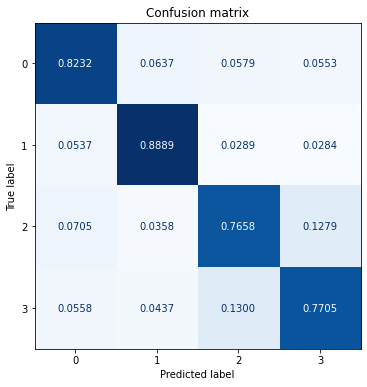


Random Forest
classification report
              precision    recall  f1-score   support

       World     0.9194    0.8947    0.9069      1900
      Sports     0.9207    0.9774    0.9482      1900
    Business     0.8776    0.8532    0.8652      1900
    Sci/Tech     0.8733    0.8674    0.8703      1900

    accuracy                         0.8982      7600
   macro avg     0.8978    0.8982    0.8977      7600
weighted avg     0.8978    0.8982    0.8977      7600

Feature extraction fit time: 4.678530216217041
Train time: 239.22997641563416
Total train time: 243.9085066318512
Feature extraction transform time: 0.28699612617492676
Test time: 0.2579941749572754
Total test time: 0.5449903011322021


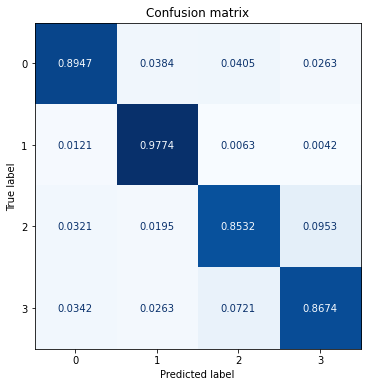


XGBoost
classification report
              precision    recall  f1-score   support

       World     0.9119    0.8879    0.8997      1900
      Sports     0.9286    0.9579    0.9430      1900
    Business     0.8698    0.8505    0.8600      1900
    Sci/Tech     0.8556    0.8700    0.8627      1900

    accuracy                         0.8916      7600
   macro avg     0.8915    0.8916    0.8914      7600
weighted avg     0.8915    0.8916    0.8914      7600

Feature extraction fit time: 4.678530216217041
Train time: 77.94137048721313
Total train time: 82.61990070343018
Feature extraction transform time: 0.28699612617492676
Test time: 0.07000017166137695
Total test time: 0.3569962978363037


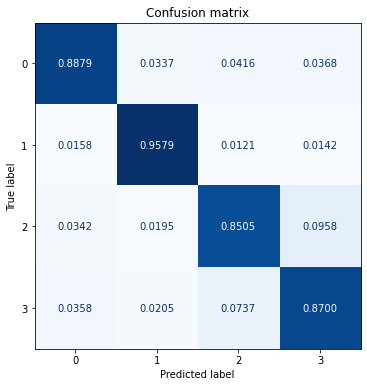


BoW
Decision Tree
classification report
              precision    recall  f1-score   support

       World     0.8358    0.8521    0.8439      1900
      Sports     0.8837    0.8995    0.8915      1900
    Business     0.7914    0.7847    0.7881      1900
    Sci/Tech     0.8054    0.7821    0.7936      1900

    accuracy                         0.8296      7600
   macro avg     0.8291    0.8296    0.8293      7600
weighted avg     0.8291    0.8296    0.8293      7600

Feature extraction fit time: 3.9858813285827637
Train time: 113.90726852416992
Total train time: 117.89314985275269
Feature extraction transform time: 0.23832964897155762
Test time: 0.004967451095581055
Total test time: 0.24329710006713867


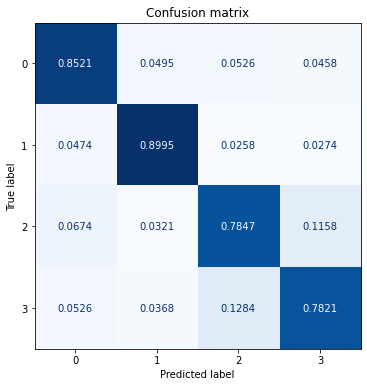


Random Forest
classification report
              precision    recall  f1-score   support

       World     0.9193    0.8937    0.9063      1900
      Sports     0.9192    0.9758    0.9466      1900
    Business     0.8772    0.8568    0.8669      1900
    Sci/Tech     0.8734    0.8642    0.8688      1900

    accuracy                         0.8976      7600
   macro avg     0.8973    0.8976    0.8972      7600
weighted avg     0.8973    0.8976    0.8972      7600

Feature extraction fit time: 3.9858813285827637
Train time: 270.29408144950867
Total train time: 274.27996277809143
Feature extraction transform time: 0.23832964897155762
Test time: 0.2765994071960449
Total test time: 0.5149290561676025


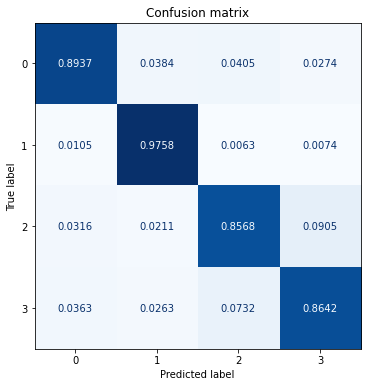


XGBoost
classification report
              precision    recall  f1-score   support

       World     0.9132    0.8916    0.9023      1900
      Sports     0.9270    0.9553    0.9409      1900
    Business     0.8704    0.8553    0.8628      1900
    Sci/Tech     0.8620    0.8711    0.8665      1900

    accuracy                         0.8933      7600
   macro avg     0.8931    0.8933    0.8931      7600
weighted avg     0.8931    0.8933    0.8931      7600

Feature extraction fit time: 3.9858813285827637
Train time: 20.542734384536743
Total train time: 24.528615713119507
Feature extraction transform time: 0.23832964897155762
Test time: 0.06299924850463867
Total test time: 0.3013288974761963


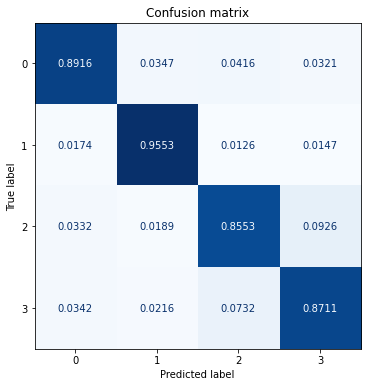


N-gram
Decision Tree
classification report
              precision    recall  f1-score   support

       World     0.8131    0.8221    0.8176      1900
      Sports     0.8529    0.8700    0.8614      1900
    Business     0.7568    0.7584    0.7576      1900
    Sci/Tech     0.7806    0.7547    0.7675      1900

    accuracy                         0.8013      7600
   macro avg     0.8009    0.8013    0.8010      7600
weighted avg     0.8009    0.8013    0.8010      7600

Feature extraction fit time: 13.54609727859497
Train time: 842.5721666812897
Total train time: 856.1182639598846
Feature extraction transform time: 0.528876781463623
Test time: 0.026002168655395508
Total test time: 0.5548789501190186


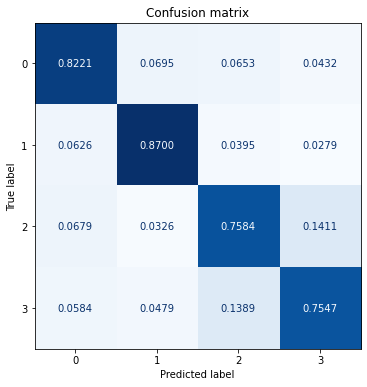


Random Forest
classification report
              precision    recall  f1-score   support

       World     0.9204    0.8942    0.9071      1900
      Sports     0.9217    0.9795    0.9497      1900
    Business     0.8772    0.8500    0.8634      1900
    Sci/Tech     0.8743    0.8716    0.8730      1900

    accuracy                         0.8988      7600
   macro avg     0.8984    0.8988    0.8983      7600
weighted avg     0.8984    0.8988    0.8983      7600

Feature extraction fit time: 13.54609727859497
Train time: 1240.4434025287628
Total train time: 1253.9894998073578
Feature extraction transform time: 0.528876781463623
Test time: 1.0648605823516846
Total test time: 1.5937373638153076


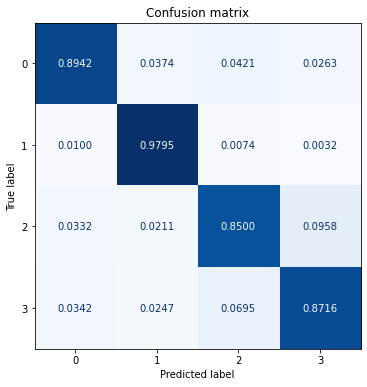


XGBoost
classification report
              precision    recall  f1-score   support

       World     0.9128    0.8811    0.8966      1900
      Sports     0.9169    0.9584    0.9372      1900
    Business     0.8655    0.8500    0.8577      1900
    Sci/Tech     0.8579    0.8642    0.8610      1900

    accuracy                         0.8884      7600
   macro avg     0.8883    0.8884    0.8881      7600
weighted avg     0.8883    0.8884    0.8881      7600

Feature extraction fit time: 13.54609727859497
Train time: 162.6406488418579
Total train time: 176.18674612045288
Feature extraction transform time: 0.528876781463623
Test time: 0.649702787399292
Total test time: 1.178579568862915


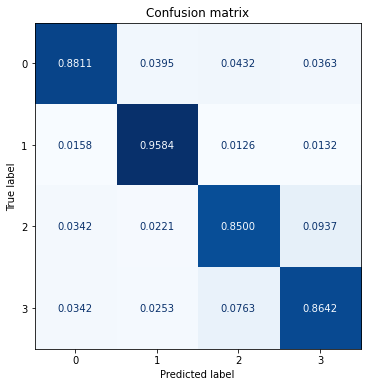

In [9]:
for i, feat in enumerate(features):
    X_train = feat[0]
    y_train = train['label']
    train_fe_time = feat[2]
    
    X_test = feat[1]
    y_test = test['label']
    test_fe_time = feat[3]
    
    print(ft_names[i])
    for j, clf in enumerate(classifiers):
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()
        train_time = end_time - start_time
        
        start_time = time.time()
        y_pred = clf.predict(X_test)
        end_time = time.time()
        test_time = end_time - start_time
        
        print(classifier_names[j])
        print('classification report')
        print(classification_report(y_test, y_pred, target_names=label_names, digits=4))
        print(f"Feature extraction fit time: {train_fe_time}")
        print(f"Train time: {train_time}")
        print(f"Total train time: {train_time + train_fe_time}")
        print(f"Feature extraction transform time: {test_fe_time}")
        print(f"Test time: {test_time}")
        print(f"Total test time: {test_time + test_fe_time}")
        plot_confusion_matrix(y_test, y_pred)
        print()